In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import random

In [2]:

def generateRandomSparseSymmetricMatrix(size, density):
    """
    Generate a random sparse symmetric matrix.
    
    Parameters
    ----------
    size : int
        The size of the matrix.

    density : float
        The density of the generated matrix, density equal to one means a 
        full matrix, density of 0 means a matrix with no non-zero items.
    
    Returns
    -------
    sparse_symmetric_matrix : numpy.ndarray
        Symmetric n x n matrix with random values.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the 
        local variables of the algorithm for purposes like plotting or debugging.
    """

    ################################################################
    # WRITE THE CODE FOR THIS FUNCTION (CAN USE INBUILT FUNCTIONS) #
    ################################################################
    sparse_matrix = random(size, size, density=density, format='csr')
    symmetric_matrix = sparse_matrix + sparse_matrix.T - np.diag(sparse_matrix.diagonal())
    return symmetric_matrix



In [3]:
def generateRandomSparseVector(size, density):
    """
    Generate a random sparse vector.

    Parameters
    ----------
    size : int
        The size of the vector.
    
    density : float
        The density of the generated vector, density equal to one means a 
        full vector, density of 0 means a vector with no non-zero items.
    
    Returns
    -------
    sparse_vector numpy.ndarray
        Vector of size n with random values.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the 
        local variables of the algorithm for purposes like plotting or debugging.
    """

    ################################################################
    # WRITE THE CODE FOR THIS FUNCTION (CAN USE INBUILT FUNCTIONS) #
    ################################################################
    sparse_vector = random(1, size, density=density, format='csr')

    return sparse_vector.toarray()

In [4]:
def steepestDescentLinearSystemEquations(matrix, vector, tolerance, max_iterations=10000):
    """
    Solve a linear system of equations using the steepest descent method.

    Parameters
    ----------
    matrix : numpy.ndarray
        A square matrix of size n x n.
    vector : numpy.ndarray
        A vector of size n.
    tolerance : float
        The tolerance for the stopping criterion.
    max_iterations : int
        The maximum number of iterations to perform if the stopping criterion is not met.

    Returns
    -------
    optima : numpy.ndarray
        The solution of the linear system of equations.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the 
        local variables of the algorithm for purposes like plotting or debugging.
    """
#     print(vector)
    x0 = np.zeros_like(vector)  # Initialize x0 to zeros of appropriate size
    i = 0
    x0=x0.T
#     print(np.dot(matrix, x0))
    grad = np.dot(matrix, x0) - vector.T  # Compute the initial gradient
    grad_norm=[]
    delta_norm=[]
    iterations=[]
    while np.linalg.norm(grad)>tolerance and i<max_iterations:
        i+=1
        iterations.append(i)
        grad=np.dot(matrix,x0)-vector.T
        grad_norm.append(np.linalg.norm(grad))
        
        b=-grad
        a0=np.dot(b.T,b)
        a1=np.dot(b.T,matrix)
        a2=np.dot(a1,b)
        if a2.item()==0:
            a=0
        else:
            a3=(a0/a2)
            a=a3.item()
         
        x0=x0+a*b
        delta_norm.append(np.linalg.norm(a*b))
        print(f'i:{i}grad:{np.linalg.norm(grad)},delta:{np.linalg.norm(a*b)}')
    cache=[iterations,grad_norm,delta_norm]
    return cache,x0
# Example usage:
# matrix = your_matrix
# vector = your_vector
# tolerance = your_tolerance
# solution, _ = steepestDescentLinearSystemEquations(matrix, vector, tolerance)
# print(solution)


In [34]:
n=3
density=0.3
tol=0.001
matrix=generateRandomSparseSymmetricMatrix(n,density)
vector=generateRandomSparseVector(n,density)
cache,x0=steepestDescentLinearSystemEquations(matrix,vector,tol)
print(x0)

i:1grad:0.8962613054236156,delta:49.53571577371752
i:2grad:0.0,delta:0.0
[[49.53571577]
 [ 0.        ]
 [ 0.        ]]


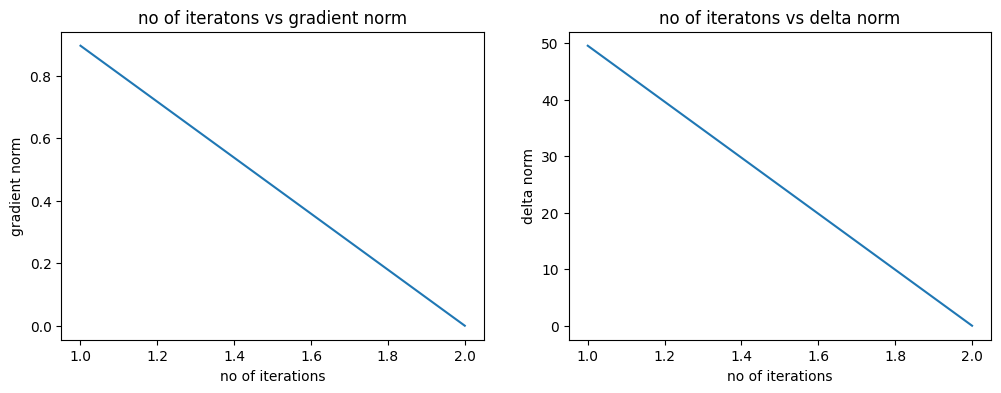

In [36]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(cache[0],cache[1])
ax[0].set_title('no of iteratons vs gradient norm')
ax[0].set_ylabel('gradient norm')
ax[0].set_xlabel('no of iterations')
ax[1].plot(cache[0],cache[2])
ax[1].set_title('no of iteratons vs delta norm')
ax[1].set_ylabel('delta norm')
ax[1].set_xlabel('no of iterations')
plt.show()

In [39]:
n=3
density=0.3
tol=0.001
matrix=generateRandomSparseSymmetricMatrix(n,density)
vector=generateRandomSparseVector(n,density)
cache,x0=steepestDescentLinearSystemEquations(matrix,vector,tol)
print(x0)

i:1grad:0.1079955308765389,delta:0.12699403394902975
i:2grad:0.021607652445553564,delta:98864566393079.0
i:3grad:37914795208878.42,delta:226502924011579.72
i:4grad:115805680630639.53,delta:387665845495291.56
i:5grad:237774909737431.56,delta:1017984131258194.5
i:6grad:632603643971816.9,delta:2114134058738170.5
i:7grad:1313797750482697.2,delta:5624704046672041.0
i:8grad:3495391006465444.5,delta:1.1681445472192524e+16
i:9grad:7259265396932668.0,delta:3.107877101574748e+16
i:10grad:1.9313452907148652e+16,delta:6.454472377974478e+16
i:11grad:4.011038539758811e+16,delta:1.717228142191565e+17
i:12grad:1.0671466010751326e+17,delta:3.566357757467246e+17
i:13grad:2.216261465551119e+17,delta:9.488381927459494e+17
i:14grad:5.896417764659232e+17,delta:1.9705572987885658e+18
i:15grad:1.224574342779101e+18,delta:5.242715827289111e+18
i:16grad:3.2580099510564946e+18,delta:1.0888128258244585e+19
i:17grad:6.766269884225802e+18,delta:2.8968131190169235e+19
i:18grad:1.8001826303426087e+19,delta:6.01613244

C:\Users\adity\AppData\Local\Temp\ipykernel_122364\2689853061.py:46: RuntimeWarning: invalid value encountered in divide
  a3=(a0/a2)


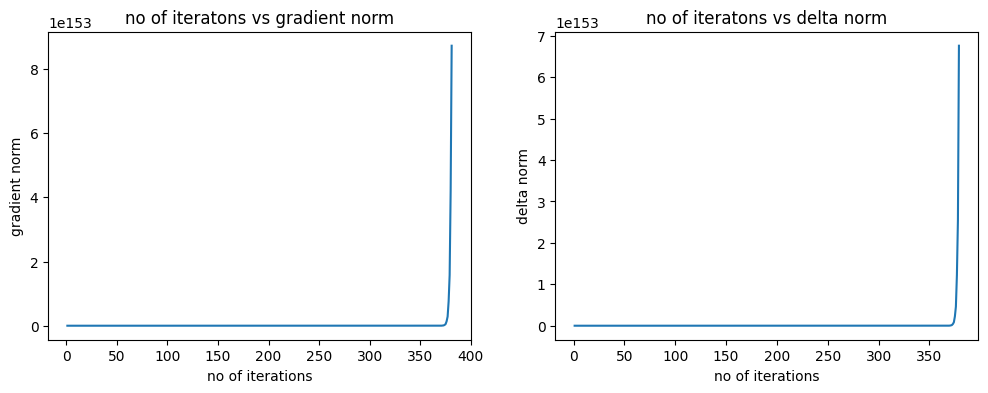

In [40]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(cache[0],cache[1])
ax[0].set_title('no of iteratons vs gradient norm')
ax[0].set_ylabel('gradient norm')
ax[0].set_xlabel('no of iterations')
ax[1].plot(cache[0],cache[2])
ax[1].set_title('no of iteratons vs delta norm')
ax[1].set_ylabel('delta norm')
ax[1].set_xlabel('no of iterations')
plt.show()